In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
m = 1
hbar = 1
xmin = -6
xmax = 6
N = 1000 # size
x = np.linspace(xmin,xmax,N+1)
dx = x[1] - x[0]
p = 40
V0 = p**2/(2*m)
sigma = 0.15
x0 = 2

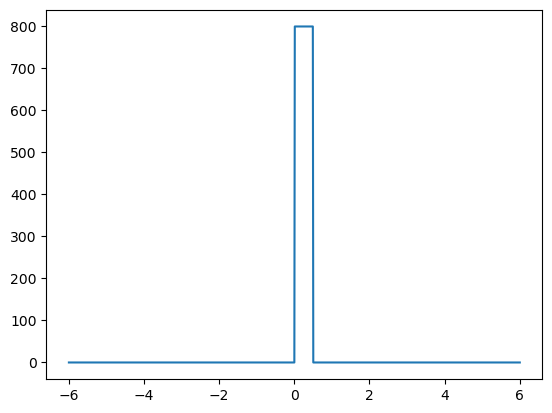

In [16]:
V = 0*x
for i in range(len(V)):
    if x[i]>0 and x[i] < 0.5:
        V[i]=V0
plt.plot(x,V)
plt.show()

In [17]:
Psi0 = np.exp( - (x[1:-1]+x0)**2/sigma**2)*np.exp(1j*p*(x[1:-1] + x0))

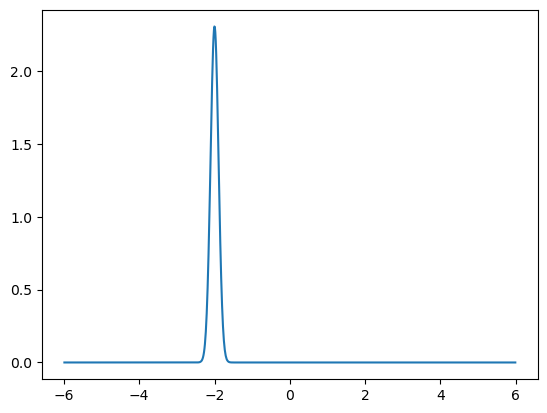

In [18]:
A = np.sum(np.abs(Psi0)**2*dx)
Psi0 = Psi0/np.sqrt(A)
plt.plot(x[1:-1], np.abs(Psi0))
plt.show()

In [19]:
n = 6
H = -2*np.diag(np.ones(n))
print(H)
S = np.diag(np.ones(n-1),1)
print(S)
H = H+S
print(H)

[[-2. -0. -0. -0. -0. -0.]
 [-0. -2. -0. -0. -0. -0.]
 [-0. -0. -2. -0. -0. -0.]
 [-0. -0. -0. -2. -0. -0.]
 [-0. -0. -0. -0. -2. -0.]
 [-0. -0. -0. -0. -0. -2.]]
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]]
[[-2.  1.  0.  0.  0.  0.]
 [ 0. -2.  1.  0.  0.  0.]
 [ 0.  0. -2.  1.  0.  0.]
 [ 0.  0.  0. -2.  1.  0.]
 [ 0.  0.  0.  0. -2.  1.]
 [ 0.  0.  0.  0.  0. -2.]]


In [20]:
H = (hbar**2/(m*dx**2))*np.diag(np.ones(N-1))+V[1:-1]*np.diag(np.ones(N-1))+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),1)+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),-1)
print(H.shape)

(999, 999)


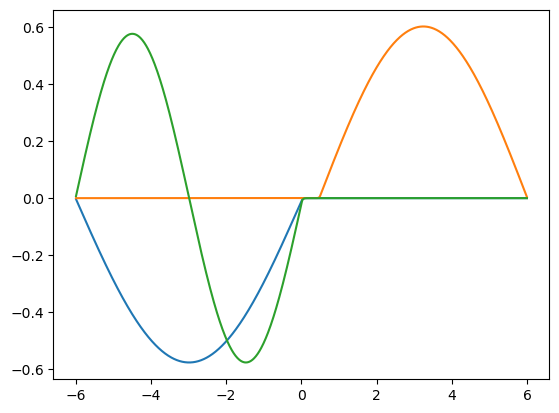

In [21]:
E, psi = np.linalg.eigh(H)
psi = psi.T

A = np.sum(np.abs(psi[0])**2*dx)
psi = psi/np.sqrt(A)

plt.plot(x[1:-1],psi[0])
plt.plot(x[1:-1],psi[1])
plt.plot(x[1:-1],psi[2])
plt.show()

In [22]:
c = 0*Psi0

for i in range(len(c)):
    c[i] = np.sum(np.conj(psi[i])*Psi0*dx)

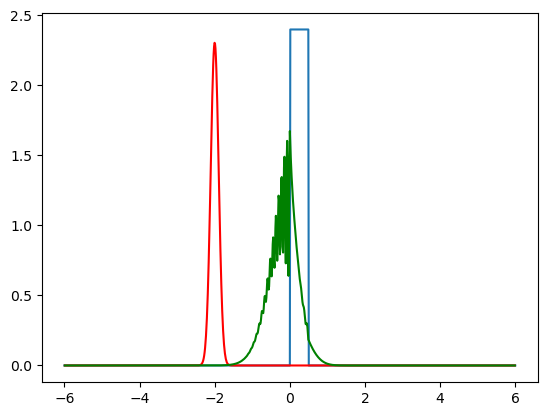

In [23]:
t = 0
dt = 0.001
Psi = 0*psi[0]
for i in range(len(c)):
    Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t/hbar)

plt.plot(x,0.003*V)
plt.plot(x[1:-1], np.abs(Psi), "-r")

#Hitting the boundary
t = t + 50*dt
Psi = 0*psi[0]
for i in range(len(c)):
    Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t/hbar)
plt.plot(x[1:-1], np.abs(Psi), "-g")
plt.show()

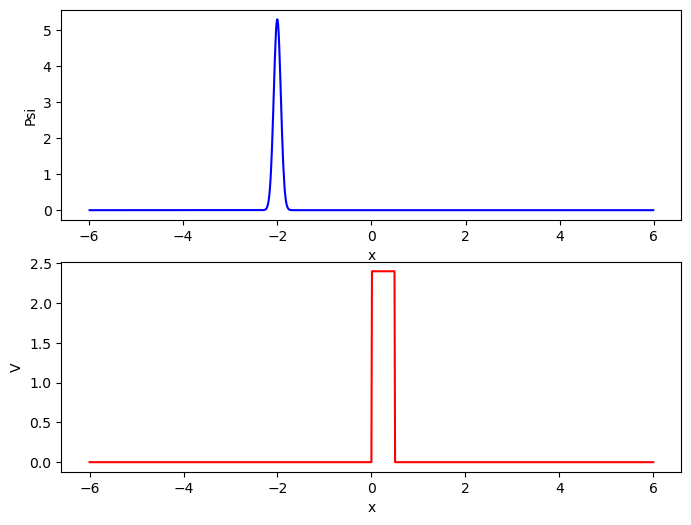

In [24]:
from matplotlib.animation import FuncAnimation # type: ignore

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6)) 
ax1.set_xlabel("x") 
ax1.set_ylabel("Psi") 
ax2.set_xlabel("x") 
ax2.set_ylabel("V")

line1 = ax1.plot(x[1:-1], np.abs(Psi0)**2, color="blue") 
line2 = ax2.plot(x, 0.003*V, color="red")